# Synthetic Data Generation with Builder
This notebook demonstrates how to use the Builder class to generate synthetic datasets with known causal structures for causal discovery experiments

## Setup

First, we import necessary libraries and the `Builder` class:

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

In [4]:
from src.generation.builder import Builder
import math
import networkx as nx

## Initialization
We initialize a `Builder` object with the following parameters:

- **observations**: 250 observations per dataset
- **n_variables_exo**: 2 exogenous variables
- **n_variables_endo**: 4 endogenous variables
- **functions_to_use**: Various functional relationships between variables
  - Linear relationships
  - Polynomial relationships
  - Sigmoid transformations
  - Nonlinear functions (sine, hyperbolic tangent)
  - Interaction effects between variables
- **functions_kwargs**: Specific parameters for the functions
  - Polynomial degrees: [1,2] and [2,3]
  - Nonlinear functions: sine and hyperbolic tangent
- **datasets_per_function**: 40 datasets generated per function type
- **noise_std**: 0.2 standard deviation of noise added
- **seed**: 123 for reproducibility


In [3]:
builder = Builder(
    observations=250,  # number of observations per dataset
    n_variables_exo=4,  # number of exogenous variables
    n_variables_endo=6,  # number of endogenous variables
    functions_to_use=[
            "linear",
            "polynomial",
            "sigmoid",
            "nonlinear",
            "interaction",
        ],  # functions to generate the data
    functions_kwargs={
        "polynomial": [[1, 2], [2, 3]],  # arguments for the functions
        'nonlinear': [math.sin, math.tanh],
    },  # arguments for the functions
    datasets_per_function=40,  # number of datasets to generate per function
    noise_std=0.2,  # standard deviation of noise
    seed=123  # seed for reproducibility
)

## Actual Data Generation

The `build()` method generates:
1. Random Directed Acyclic Graphs (DAGs) representing causal relationships
2. Synthetic data following these causal structures
3. Different types of functional relationships between variables

In [4]:
# Step 2: Generate the datasets and DAGs
builder.build()

Generating data for linear function...
Generating data for sigmoid function...
Generating data for interaction function...
Generating data for poly_deg_1_2 function...
Generating data for poly_deg_2_3 function...
Generating data for nonlinear_sin function...
Generating data for nonlinear_tanh function...


In [13]:
# we can check one of the generated dataset
adjacency_matrix = builder.get_adjacency_matrix('linear', 0)
adjacency_matrix

,U0,U1,U2,U3,X0,X1,X2,X3,X4,X5
U0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
U1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
U2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
U3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
X0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
X1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
X3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
X4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
X5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
correlation_matrix = builder.get_correlation_matrix('linear', 0)
correlation_matrix

,X0,X1,X2,X3,X4,X5,U0,U1,U2,U3
X0,1.000000,0.971173,0.958397,0.964294,0.964294,1.000000,0.964294,0.153399,-0.000394,0.104078
X1,0.971173,1.000000,0.929775,0.956651,0.956651,0.971173,0.956651,0.103245,0.222894,0.038240
X2,0.958397,0.929775,1.000000,0.903272,0.903272,0.958397,0.903272,0.381684,0.024396,-0.057440
X3,0.964294,0.956651,0.903272,1.000000,1.000000,0.964294,1.000000,-0.051821,-0.009088,-0.070085
X4,0.964294,0.956651,0.903272,1.000000,1.000000,0.964294,1.000000,-0.051821,-0.009088,-0.070085
X5,1.000000,0.971173,0.958397,0.964294,0.964294,1.000000,0.964294,0.153399,-0.000394,0.104078
U0,0.964294,0.956651,0.903272,1.000000,1.000000,0.964294,1.000000,-0.051821,-0.009088,-0.070085
U1,0.153399,0.103245,0.381684,-0.051821,-0.051821,0.153399,-0.051821,1.000000,0.076361,0.017285
U2,-0.000394,0.222894,0.024396,-0.009088,-0.009088,-0.000394,-0.009088,0.076361,1.000000,-0.040181
U3,0.104078,0.038240,-0.057440,-0.070085,-0.070085,0.104078,-0.070085,0.017285,-0.040181,1.000000


In [15]:
covariance_matrix = builder.get_covariance_matrix('linear', 0)
covariance_matrix

,X0,X1,X2,X3,X4,X5,U0,U1,U2,U3
X0,1.053368,1.906404,0.349894,0.329383,0.508485,1.666754,0.286632,0.044351,-0.000118,0.031294
X1,1.906404,3.658110,0.632567,0.608953,0.940071,3.016522,0.529916,0.055628,0.124742,0.021427
X2,0.349894,0.632567,0.126532,0.106935,0.165081,0.553640,0.093056,0.038247,0.002539,-0.005986
X3,0.329383,0.608953,0.106935,0.110765,0.170994,0.521186,0.096389,-0.004858,-0.000885,-0.006833
X4,0.508485,0.940071,0.165081,0.170994,0.263972,0.804581,0.148800,-0.007500,-0.001366,-0.010549
X5,1.666754,3.016522,0.553640,0.521186,0.804581,2.637322,0.453541,0.070178,-0.000187,0.049516
U0,0.286632,0.529916,0.093056,0.096389,0.148800,0.453541,0.083878,-0.004228,-0.000770,-0.005947
U1,0.044351,0.055628,0.038247,-0.004858,-0.007500,0.070178,-0.004228,0.079358,0.006294,0.001427
U2,-0.000118,0.124742,0.002539,-0.000885,-0.001366,-0.000187,-0.000770,0.006294,0.085620,-0.003444
U3,0.031294,0.021427,-0.005986,-0.006833,-0.010549,0.049516,-0.005947,0.001427,-0.003444,0.085826


In [16]:
parcorr_matrix = builder.get_parcorr_matrix('linear', 0)
parcorr_matrix

,X0,X1,X2,X3,X4,X5,U0,U1,U2,U3
X0,1.000000,0.200562,0.715954,-0.032987,-0.877402,0.332820,0.201921,0.840657,0.073147,0.165839
X1,0.200562,1.000000,-0.889608,0.771791,0.488402,0.679519,0.764164,0.204305,1.000000,0.022596
X2,0.715954,-0.889608,1.000000,-0.615802,0.784903,0.489894,-0.088566,0.991770,-0.122967,-0.158004
X3,-0.032987,0.771791,-0.615802,1.000000,0.983957,-0.322550,0.995101,-0.984667,-0.263364,-0.764297
X4,-0.877402,0.488402,0.784903,0.983957,1.000000,-0.117881,0.937692,-0.705364,-0.928222,-0.642411
X5,0.332820,0.679519,0.489894,-0.322550,-0.117881,1.000000,0.775881,0.657290,0.238529,0.351721
U0,0.201921,0.764164,-0.088566,0.995101,0.937692,0.775881,1.000000,0.030698,-0.469047,-0.913642
U1,0.840657,0.204305,0.991770,-0.984667,-0.705364,0.657290,0.030698,1.000000,0.972544,-0.148603
U2,0.073147,1.000000,-0.122967,-0.263364,-0.928222,0.238529,-0.469047,0.972544,1.000000,0.338466
U3,0.165839,0.022596,-0.158004,-0.764297,-0.642411,0.351721,-0.913642,-0.148603,0.338466,1.000000


## Deep Neural Network

In [9]:
# Example usage with the Builder class
def generate_training_data(builder, n_samples=100):
    """
    Generate training data from the Builder class.
    
    Args:
        builder (Builder): Builder instance
        n_samples (int): Number of samples to generate
        
    Returns:
        tuple: (parcorr_matrices, adjacency_matrices)
    """
    parcorr_matrices = []
    adjacency_matrices = []
    
    # Get all function names
    function_names = list(builder.generated_observations.keys())
    
    # Iterate over each function
    for function_name in function_names:
        # Get maximum index for this function
        max_index = len(builder.generated_observations[function_name]) - 1
        
        # Generate samples for this function
        for i in range(min(n_samples // len(function_names), max_index + 1)):
            parcorr_matrix = builder.get_parcorr_matrix(function_name, i)
            adjacency_matrix = builder.get_adjacency_matrix(function_name, i)
            
            parcorr_matrices.append(parcorr_matrix.values)
            adjacency_matrices.append(adjacency_matrix.values)
    
    return np.array(parcorr_matrices), np.array(adjacency_matrices)

Generating data for linear function...
Generating data for sigmoid function...
Generating data for interaction function...
Generating data for poly_deg_1_2 function...
Generating data for poly_deg_2_3 function...
Generating data for nonlinear_sin function...
Generating data for nonlinear_tanh function...
Epoch 1/50


c:\Users\gmpal\miniforge3\envs\sd2c\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2501 - loss: nan
Epoch 1: val_loss did not improve from inf
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.2498 - loss: nan - val_accuracy: 0.2200 - val_loss: nan
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2444 - loss: nan
Epoch 2: val_loss did not improve from inf
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.2446 - loss: nan - val_accuracy: 0.2200 - val_loss: nan
Epoch 3/50
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2632 - loss: nan
Epoch 3: val_loss did not improve from inf
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2601 - loss: nan - val_accuracy: 0.2200 - val_loss: nan
Epoch 4/50
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2484 - loss: nan
Epoch 4: val_loss did not improve from inf
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2480 - loss: nan - val_accuracy: 0.2200 - val_loss: nan
Epoch 5/50
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2334 -

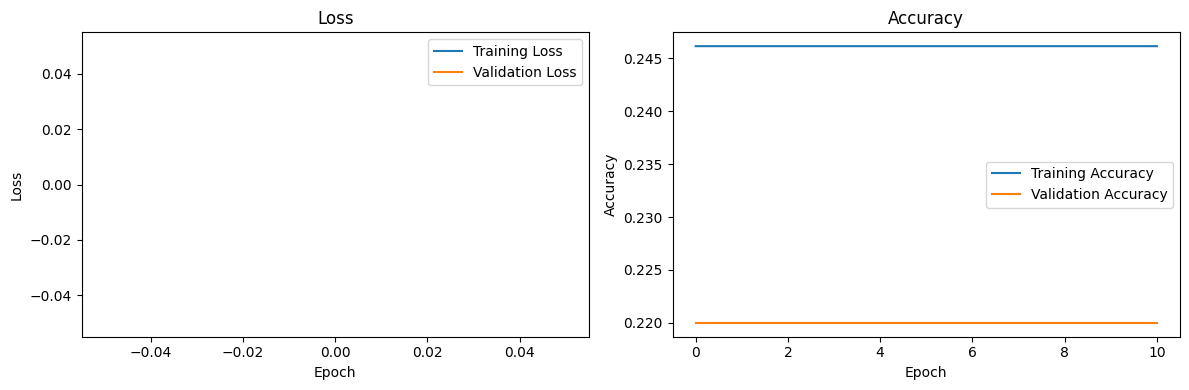

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


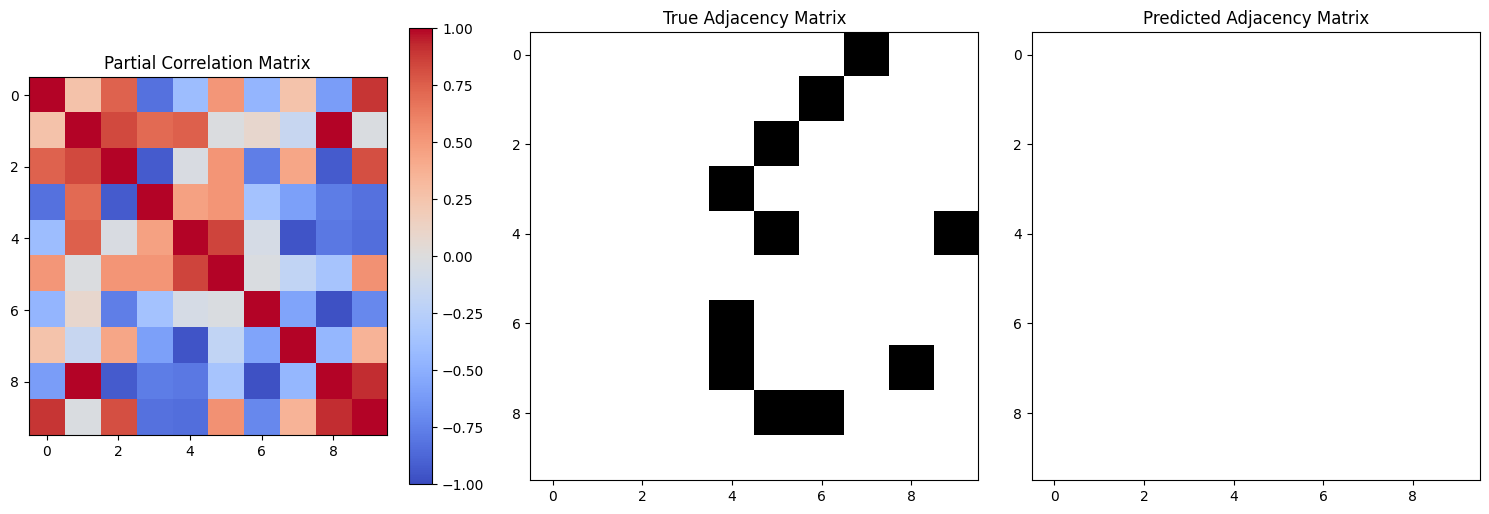

In [12]:
import matplotlib.pyplot as plt
# Main execution example
if __name__ == "__main__":
    # Create and build a Builder instance
    
    builder = Builder(
    observations=250,  # number of observations per dataset
    n_variables_exo=4,  # number of exogenous variables
    n_variables_endo=6,  # number of endogenous variables
    functions_to_use=[
            "linear",
            "polynomial",
            "sigmoid",
            "nonlinear",
            "interaction",
        ],  # functions to generate the data
    functions_kwargs={
        "polynomial": [[1, 2], [2, 3]],  # arguments for the functions
        'nonlinear': [math.sin, math.tanh],
    },  # arguments for the functions
    datasets_per_function=40,  # number of datasets to generate per function
    noise_std=0.2,  # standard deviation of noise
    seed=123  # seed for reproducibility
    )
    builder.build()
    
    # Generate training data
    parcorr_matrices, adjacency_matrices = generate_training_data(builder, n_samples=200)
    
    # Create and train the model
    model = ParcorrToAdjacencyModel(input_shape=(10, 10, 1), output_shape=(10, 10))
    
    # Prepare the data
    X_train, X_val, y_train, y_val = model.prepare_data(parcorr_matrices, adjacency_matrices)
    
    # Train the model
    history = model.train(X_train, y_train, X_val, y_val, epochs=50, batch_size=16)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Test on a single example
    test_parcorr = builder.get_parcorr_matrix("linear", 0)
    test_adjacency = builder.get_adjacency_matrix("linear", 0)
    
    # Plot comparison
    model.plot_comparison(test_parcorr.values, test_adjacency.values)